<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/3%EB%B2%88%EC%A7%B8_%EA%B0%95%EC%9D%98_%EB%94%B0%EB%A6%89%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 50.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib #주의사항 -> matplotlib를 먼저 import 후에 해야함

In [4]:
df = pd.read_csv('서울특별시 공공자전거 이용정보(월별)_22.06.csv',encoding='cp949')
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06,3,중랑센터,일일(비회원),\N,기타,1,29.34,0.26,1140.00,6
1,2022-06,3,중랑센터,일일(회원),M,50대,19,458.11,4.44,19280.00,117
2,2022-06,3,중랑센터,정기,\N,20대,12,330.13,3.39,14626.81,75
3,2022-06,3,중랑센터,정기,\N,60대,4,113.53,1.02,4410.69,22
4,2022-06,3,중랑센터,정기,M,20대,2,13.69,0.07,320.00,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133101 entries, 0 to 133100
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     133101 non-null  object 
 1   대여소번호    133101 non-null  int64  
 2   대여소명     133101 non-null  object 
 3   대여구분코드   133101 non-null  object 
 4   성별       116189 non-null  object 
 5   연령대코드    133101 non-null  object 
 6   이용건수     133101 non-null  int64  
 7   운동량      133101 non-null  object 
 8   탄소량      133101 non-null  object 
 9   이동거리(M)  133101 non-null  float64
 10  이용시간(분)  133101 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [6]:
df.tail()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
133096,2022-06,9999,상담센터,정기,M,기타,4,525.03,3.84,16543.52,109
133097,2022-06,88888,88888.영남배송,정기,M,60대,7,831.71,7.62,32816.68,200
133098,2022-06,99998,99998. 상암단말정비,정기,\N,20대,1,20.85,0.26,1120.00,11
133099,2022-06,99999,99999. 영남단말기정비,정기,\N,기타,15,0.00,0.00,0.00,25
133100,2022-06,99999,99999. 영남단말기정비,정기,M,30대,1,14.71,0.11,464.44,9


In [7]:
df.describe()

,대여소번호,이용건수,이동거리(M),이용시간(분)
count,133101.000000,133101.000000,1.331010e+05,133101.000000
mean,2133.390733,31.980917,8.726781e+04,729.954516
std,1560.201091,63.226084,1.740702e+05,1415.938446
min,3.000000,1.000000,0.000000e+00,0.000000
25%,906.000000,3.000000,8.238770e+03,76.000000
50%,1826.000000,10.000000,2.859469e+04,249.000000
75%,3509.000000,33.000000,9.287133e+04,792.000000
max,99999.000000,1952.000000,7.781742e+06,78879.000000


In [8]:
df.isnull().sum()

대여일자           0
대여소번호          0
대여소명           0
대여구분코드         0
성별         16912
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리(M)        0
이용시간(분)        0
dtype: int64

In [9]:
df['성별'] = df['성별'].fillna('E')
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06,3,중랑센터,일일(비회원),\N,기타,1,29.34,0.26,1140.00,6
1,2022-06,3,중랑센터,일일(회원),M,50대,19,458.11,4.44,19280.00,117
2,2022-06,3,중랑센터,정기,\N,20대,12,330.13,3.39,14626.81,75
3,2022-06,3,중랑센터,정기,\N,60대,4,113.53,1.02,4410.69,22
4,2022-06,3,중랑센터,정기,M,20대,2,13.69,0.07,320.00,4


In [10]:
df['성별'].unique()

array(['\\N', 'M', 'F', 'E', 'm', 'f'], dtype=object)

In [11]:
df['성별'] = df['성별'].str.upper()
df.loc[df['성별'] == '\\N','성별'] = 'E' # loc -> 모든 행, 성별=\\N인 행을 찾아서 성별을 E로 바꿔라
df['성별'].unique()

array(['E', 'M', 'F'], dtype=object)

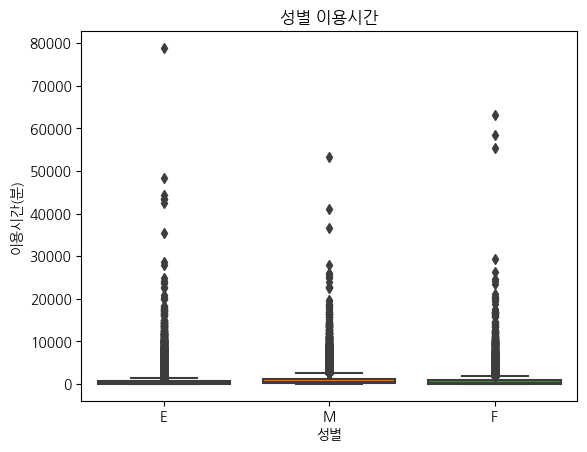

In [12]:
plt.title('성별 이용시간')
sns.boxplot(x='성별', y='이용시간(분)', data=df)
plt.show()

In [13]:
q1 = df['이용시간(분)'].quantile(0.25) # 이 값들을 만드는 방법?
q2 = df['이용시간(분)'].quantile(0.50)
q3 = df['이용시간(분)'].quantile(0.75)

iqr = q3 - q1
iqr

716.0

In [14]:
q1 - 1.5*iqr # 이 값 보다 작으면 이상치 데이터
q3 + 1.5*iqr # 이 값 보다 초과하면 이상치 데이터

1866.0

In [15]:
outdata = df['이용시간(분)'] > q3 + 1.5*iqr #삭제할 데이터
outdata # True라고 나오는 데이터 삭제 필요
outdata = df[outdata].index # 이상치 데이터의 인덱스
outdata
df.drop(outdata, inplace=True) #이상치 데이터 삭제 -> 보고서 작성 시 몇개의 데이터 제거했나 표시 필요, inplace=True -> 기존 데이터프레임에 덮어쓰기

In [20]:
df.value_counts('성별')

성별
E    50961
M    35045
F    33210
dtype: int64

<Axes: xlabel='성별'>

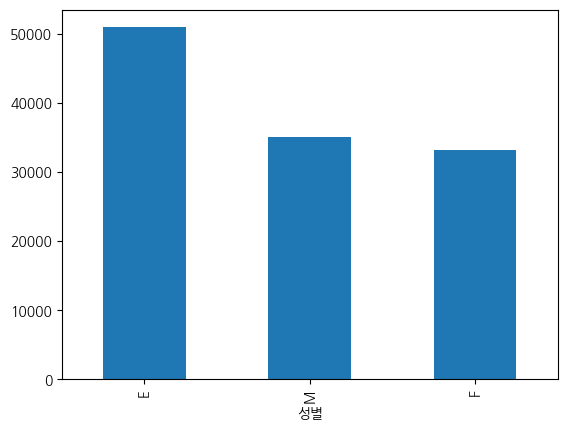

In [29]:
#e_gender = df.value_counts('성별')[0]
#m_gender = df.value_counts('성별')[1]
#f_gender = df.value_counts('성별')[2]
#plt.title('성별 수치')
#plt.bar([0,1,2],[e_gender,m_gender,f_gender])
#plt.xlabel('성별')
#plt.ylabel('명수')
#plt.show()

df.value_counts('성별').plot(kind='bar')

In [17]:
df_f = df[df['성별']=='F']
df_f.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
14,2022-06,102,102. 망원역 1번출구 앞,단체,F,10대,1,120.51,1.09,4681.84,82
15,2022-06,102,102. 망원역 1번출구 앞,단체,F,20대,5,453.62,4.09,17622.86,152
16,2022-06,102,102. 망원역 1번출구 앞,단체,F,30대,4,257.60,2.32,10007.82,143
17,2022-06,102,102. 망원역 1번출구 앞,단체,F,40대,5,794.32,8.37,36093.27,252
18,2022-06,102,102. 망원역 1번출구 앞,단체,F,50대,1,144.41,1.69,7293.22,56


In [18]:
df_m = df[df['성별']=='M']
df_m.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
1,2022-06,3,중랑센터,일일(회원),M,50대,19,458.11,4.44,19280.00,117
4,2022-06,3,중랑센터,정기,M,20대,2,13.69,0.07,320.00,4
5,2022-06,3,중랑센터,정기,M,40대,12,622.21,4.54,19557.91,120
6,2022-06,3,중랑센터,정기,M,50대,12,684.05,5.70,24518.37,293
7,2022-06,3,중랑센터,정기,M,60대,4,146.80,1.18,5078.18,147


In [21]:
# 1. 여성의 평균 이용시간
df_f['이용시간(분)'].mean()

397.4945498343872

In [22]:
# 2. 남성의 평균 이용시간
df_m['이용시간(분)'].mean()

457.31174204594095

In [24]:
df_m['이용시간(분)'].mean() - df_f['이용시간(분)'].mean()

59.81719221155373

<ipython-input-28-961e9b29350e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('성별').mean()['이용시간(분)'].plot(kind='bar')


<Axes: xlabel='성별'>

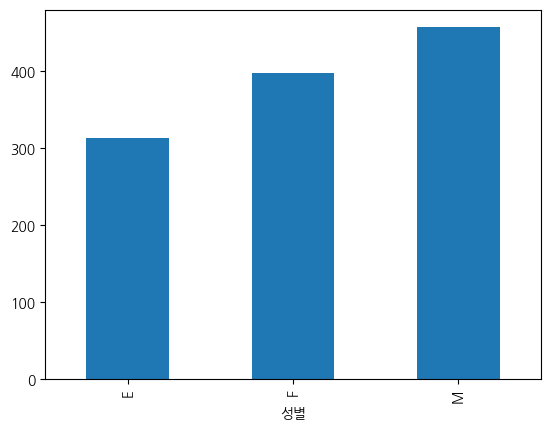

In [28]:
df.groupby('성별').mean()['이용시간(분)'].plot(kind='bar')
#유의미한 값인지 확인하려 T value? 값을 확인해야함 -> T 검정

In [30]:
# 3. 남성과여성의 평균이용시간이 차이가 있는지?

import scipy.stats as stats #가설 검증하는 패키지

stats.ttest_ind(df_f['이용시간(분)'], df_m['이용시간(분)'],equal_var=True) #pvalue구하기
#pvalue가 0에 수렴하기 때문에 두집단은 차이가 있다. -> 가설검정 내용(12페이지 확인)

Ttest_indResult(statistic=-17.28245427479672, pvalue=8.853231943408319e-67)

In [31]:
df.tail()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
133096,2022-06,9999,상담센터,정기,M,기타,4,525.03,3.84,16543.52,109
133097,2022-06,88888,88888.영남배송,정기,M,60대,7,831.71,7.62,32816.68,200
133098,2022-06,99998,99998. 상암단말정비,정기,E,20대,1,20.85,0.26,1120.00,11
133099,2022-06,99999,99999. 영남단말기정비,정기,E,기타,15,0.00,0.00,0.00,25
133100,2022-06,99999,99999. 영남단말기정비,정기,M,30대,1,14.71,0.11,464.44,9


In [32]:
# 가장많은 대여를 한 대여소 10곳

df['대여소명']

0                   중랑센터
1                   중랑센터
2                   중랑센터
3                   중랑센터
4                   중랑센터
               ...      
133096              상담센터
133097        88888.영남배송
133098     99998. 상암단말정비
133099    99999. 영남단말기정비
133100    99999. 영남단말기정비
Name: 대여소명, Length: 119216, dtype: object

In [38]:
rental_shop = []

for temp in df['대여소명']:
    if '.' in temp:
        name = temp.split('.')[-1] #다시 천천히 생각해보기
        name = name.strip() #strip() -> ()안의 문자를 제거 또는 아무것도 없을 시 공백 제거
        rental_shop.append(name)
    else:
        name = temp.strip()
        rental_shop.append(name)
df['대여소명'] = rental_shop

df.tail()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
133096,2022-06,9999,상담센터,정기,M,기타,4,525.03,3.84,16543.52,109
133097,2022-06,88888,영남배송,정기,M,60대,7,831.71,7.62,32816.68,200
133098,2022-06,99998,상암단말정비,정기,E,20대,1,20.85,0.26,1120.00,11
133099,2022-06,99999,영남단말기정비,정기,E,기타,15,0.00,0.00,0.00,25
133100,2022-06,99999,영남단말기정비,정기,M,30대,1,14.71,0.11,464.44,9


In [41]:
#피봇 테이블로 unqie 값들을 합치기
df_s = df.pivot_table(df, index='대여소명', aggfunc='sum') #aggfunc -> 나머지 데이터
df_s #대여소번호가 더해짐 -> 원본의 대여소번호로 바꿔줘야함

<ipython-input-41-3242df3930e4>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df_s = df.pivot_table(df, index='대여소명', aggfunc='sum') #aggfunc -> 나머지 데이터


,대여소번호,이동거리(M),이용건수,이용시간(분)
대여소명,,,,
(시립)고덕평생학습관,54570,1755861.43,908,18482
(재)FITI시험연구원,144372,2329756.56,1094,17865
19민주묘지 입구사거리,73696,2500823.89,926,21885
19민주묘지역,76950,1738585.86,572,14857
19민주묘지역 1번출구,98532,3261066.50,994,25505
...,...,...,...,...
흥국사 정류장,37658,586350.67,167,5016
희성오피앙,78672,2948118.96,1015,23900
희훈타워빌 앞,183535,2379489.97,983,20834


In [51]:
df[df['대여소명']=='홍련봉 공원'].iloc[0][1]

3880

In [52]:
da_no = []
for temp in df_s.index:
    da_no.append(df[df['대여소명']==temp].iloc[0][1])

df_s['대여소번호'] = da_no

In [53]:
df_s.tail()

,대여소번호,이동거리(M),이용건수,이용시간(분)
대여소명,,,,
흥국사 정류장,991,586350.67,167,5016
희성오피앙,1639,2948118.96,1015,23900
희훈타워빌 앞,3905,2379489.97,983,20834
힐스테이트에코,2720,2740974.31,1497,22486
힐스테이트클래시안아파트,4569,2161874.51,821,17932


In [56]:
df_s.sort_values(by='이용건수', ascending=False).head(10)

,대여소번호,이동거리(M),이용건수,이용시간(분)
대여소명,,,,
마곡역1번출구,1151,2740977.43,2788,25354
공항초등학교건너편,1162,2481492.82,2104,22876
마곡수명산 1-2단지,2732,3083222.61,2054,26086
마곡수명산파크 209동 건너편,1192,2534915.57,1956,22357
수명산파크 4단지 411동 앞,2746,2667164.28,1874,22349
천왕역 1번 출입구 앞,1977,3225712.27,1859,23710
우장산동 가곡어린이공원앞,5061,3023201.96,1832,29373
마곡14단지 1408동앞,3785,2500348.05,1821,24815
마곡역 교차로(2번출구),1190,1991077.98,1704,17660


In [72]:
# 기존 데이터에 GPS를 넣기 위해서 다른 CSV 파일에서 정보를 가져와야함
sinfo_df = pd.read_csv('공공자전거 대여소 정보.csv')
sinfo_df.head()

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.57579422,126.97145081,2015-10-07,20,NaN,LCD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#pands의 iloc 공부하기
sinfo_df = sinfo_df.iloc[4:, 0:6] #필요없는 부분 제거
sinfo_df.columns = ['번호', '이름', '소재지', '주소', '위도', '경도'] # 콜론 이름 생성
sinfo_df # 번호가 소수점으로 나옴 수정 필요
sinfo_df['번호'] = sinfo_df['번호'].astype('int') #소수점을 정수로 변경
sinfo_df

,번호,이름,소재지,주소,위도,경도
4,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.57579422,126.97145081
5,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.57594681,126.97406006
6,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.57176971,126.97466278
7,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.57255936,126.97833252
8,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.56999969,126.97109985
...,...,...,...,...,...,...
2718,3698,명일역 3번출구 옆,강동구,강동구 명일동 303-7,37.55142593,127.14421082
2719,3699,상일파출소 옆,강동구,강동구 상일동 520-1,37.55655289,127.1658783
2720,3700,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.54816437,127.12257385
2721,3701,방아삼거리,강동구,강동구 둔촌동 118-2,37.5232811,127.14613342


In [74]:
sinfo_df[sinfo_df['번호'] == 1151]

,번호,이름,소재지,주소,위도,경도
1436,1151,마곡역1번출구,강서구,서울특별시 강서구 마곡동 727-716,37.56020737,126.82414246


In [76]:
df_s.head(10)

,대여소번호,이동거리(M),이용건수,이용시간(분)
대여소명,,,,
(시립)고덕평생학습관,1070,1755861.43,908,18482
(재)FITI시험연구원,2724,2329756.56,1094,17865
19민주묘지 입구사거리,1568,2500823.89,926,21885
19민주묘지역,1539,1738585.86,572,14857
19민주묘지역 1번출구,1564,3261066.50,994,25505
19탑 앞,1551,1767354.36,667,14351
3호선 매봉역 3번출구앞,2335,3160216.49,914,25505
4동 주민센터 대여소,1635,1219419.20,458,8811
500번·507번 버스 종점 앞,1858,3409160.33,405,19617


In [82]:
lat = []
lng = []

for temp in df_s['대여소번호']:
    d_no = sinfo_df[sinfo_df['번호']==temp]

    try:
        lat_temp = d_no['위도'].values[0]
        lng_temp = d_no['경도'].values[0]
        lat.append(float(lat_temp))
        lng.append(float(lng_temp))
    except:
        lat.append(37.1)
        lng.append(127.1)

df_s['위도'] = lat
df_s['경도'] = lng

df_s

,대여소번호,이동거리(M),이용건수,이용시간(분),위도,경도
대여소명,,,,,,
(시립)고덕평생학습관,1070,1755861.43,908,18482,37.555702,127.157921
(재)FITI시험연구원,2724,2329756.56,1094,17865,37.568485,126.838570
19민주묘지 입구사거리,1568,2500823.89,926,21885,37.647934,127.014572
19민주묘지역,1539,1738585.86,572,14857,37.649673,127.013451
19민주묘지역 1번출구,1564,3261066.50,994,25505,37.649597,127.013847
...,...,...,...,...,...,...
흥국사 정류장,991,586350.67,167,5016,37.656769,126.942009
희성오피앙,1639,2948118.96,1015,23900,37.680313,127.055069
희훈타워빌 앞,3905,2379489.97,983,20834,37.501915,126.889244


In [83]:
df_s_top10 = df_s.sort_values(by='이용건수',ascending=False).head(10)
df_s_top10

,대여소번호,이동거리(M),이용건수,이용시간(분),위도,경도
대여소명,,,,,,
마곡역1번출구,1151,2740977.43,2788,25354,37.560207,126.824142
공항초등학교건너편,1162,2481492.82,2104,22876,37.562679,126.820473
마곡수명산 1-2단지,2732,3083222.61,2054,26086,37.555309,126.829857
마곡수명산파크 209동 건너편,1192,2534915.57,1956,22357,37.555450,126.826897
수명산파크 4단지 411동 앞,2746,2667164.28,1874,22349,37.551350,126.824936
천왕역 1번 출입구 앞,1977,3225712.27,1859,23710,37.486210,126.838821
우장산동 가곡어린이공원앞,5061,3023201.96,1832,29373,37.555454,126.837517
마곡14단지 1408동앞,3785,2500348.05,1821,24815,37.557373,126.823326
마곡역 교차로(2번출구),1190,1991077.98,1704,17660,37.560501,126.826653


In [87]:
df_s_top10.iloc[0]

대여소번호      1.151000e+03
이동거리(M)    2.740977e+06
이용건수       2.788000e+03
이용시간(분)    2.535400e+04
위도         3.756021e+01
경도         1.268241e+02
Name: 마곡역1번출구, dtype: float64

In [90]:
import folium #지도 시각화

center = [37.514390, 126.996536]
map = folium.Map(location=center, zoom_start=13) # 작아질수록 줌아웃

for temp in range(len(df_s_top10)):
    d = df_s_top10.iloc[temp]
    
    folium.Marker(location=[d['위도'], d['경도']], icon=folium.Icon(color='red'),
                  popup = d.name).add_to(map)

map

In [95]:
#이동거리가 가장 긴 순서대로 top10 찾아서 지도에 표시하기
df_r_top10 = df_s.sort_values(by='이동거리(M)',ascending=False).head(10)
df_r_top10

#이용시간이 가장 긴 순서대로 top10 찾아서 지도에 표시하기
df_t_top10 = df_s.sort_values(by='이용시간(분)',ascending=False).head(10)
df_t_top10

,대여소번호,이동거리(M),이용건수,이용시간(분),위도,경도
대여소명,,,,,,
목동현대아파트 후문 앞,4532,3533013.71,1399,33815,37.522140,126.878059
대모산입구역 4번 출구 앞,2404,4055854.80,869,32453,37.491810,127.073158
신정교 하부,780,4324114.51,776,31794,37.517338,126.877647
화랑대역 7번출구,1450,4320541.34,1149,31659,37.619637,127.085045
겸재교 진입부,1452,3993689.31,839,31586,37.585655,127.075050
금호스포츠센터앞,3525,4505573.76,856,31528,37.546089,127.025070
서울숲 공영주차장앞,3552,2964904.58,661,31480,37.541958,127.042770
신목동역 3번출구,766,4314981.30,799,31158,37.543949,126.883461
암사역 3번출구(국민은행앞),1008,3337576.31,989,31022,37.549576,127.127182


In [96]:
df_r_top10.iloc[0]
df_t_top10.iloc[0]

대여소번호      4.532000e+03
이동거리(M)    3.533014e+06
이용건수       1.399000e+03
이용시간(분)    3.381500e+04
위도         3.752214e+01
경도         1.268781e+02
Name: 목동현대아파트 후문 앞, dtype: float64

In [97]:
#이동거리가 가장 긴 순서대로 top10 찾아서 지도에 표시하기
import folium #지도 시각화

center = [37.514390, 126.996536]
map = folium.Map(location=center, zoom_start=13) # 작아질수록 줌아웃

for temp in range(len(df_r_top10)):
    d = df_r_top10.iloc[temp]
    
    folium.Marker(location=[d['위도'], d['경도']], icon=folium.Icon(color='red'),
                  popup = d.name).add_to(map)

map

In [98]:
#이용시간이 가장 긴 순서대로 top10 찾아서 지도에 표시하기
import folium #지도 시각화

center = [37.514390, 126.996536]
map = folium.Map(location=center, zoom_start=13) # 작아질수록 줌아웃

for temp in range(len(df_t_top10)):
    d = df_t_top10.iloc[temp]
    
    folium.Marker(location=[d['위도'], d['경도']], icon=folium.Icon(color='red'),
                  popup = d.name).add_to(map)

map

**AI를 활용해 적용할 수 있는 일**

1. 수요 예측을 통한 자전거 분배
2. 자전거 고장 예측
3. 따릉이 블랙박스를 활용한 관제 시스템(한강 도로 문제, 시설 문제)


In [100]:
df['연령대코드'].unique()

array(['기타', '50대', '20대', '60대', '40대', '10대', '30대', '70대이상'],
      dtype=object)

In [99]:
df_top_use = df[df['대여소명']=='마곡역1번출구']
df_top_use

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
43000,2022-06,1151,마곡역1번출구,단체,F,10대,2,42.14,0.59,2533.66,20
43001,2022-06,1151,마곡역1번출구,단체,F,20대,1,32.36,0.29,1257.10,11
43002,2022-06,1151,마곡역1번출구,단체,F,기타,2,120.39,1.18,5066.80,46
43003,2022-06,1151,마곡역1번출구,단체,M,40대,2,37.69,0.33,1400.00,24
43004,2022-06,1151,마곡역1번출구,일일(비회원),E,기타,10,1820.49,16.42,70725.85,550
43005,2022-06,1151,마곡역1번출구,일일(회원),E,10대,5,51.67,0.47,1960.00,13
43006,2022-06,1151,마곡역1번출구,일일(회원),E,20대,19,601.74,5.53,23814.88,228
43007,2022-06,1151,마곡역1번출구,일일(회원),E,30대,17,523.94,4.76,20558.58,147
43008,2022-06,1151,마곡역1번출구,일일(회원),E,40대,7,359.10,3.21,13827.84,120
43009,2022-06,1151,마곡역1번출구,일일(회원),E,50대,2,48.46,0.44,1927.96,19


In [103]:
#피봇 테이블로 unqie 값들을 합치기
df_top_use_s = pd.pivot_table(df_top_use, index='연령대코드',
                              values=['이용시간(분)','이용건수'], aggfunc='sum')
df_top_use_s['평균이용시간'] = df_top_use_s['이용시간(분)'] / df_top_use_s['이용건수']
df_top_use_s.sort_values(by='이용건수')


,이용건수,이용시간(분),평균이용시간
연령대코드,,,
70대이상,7,137,19.571429
60대,52,712,13.692308
10대,193,1618,8.383420
기타,331,3231,9.761329
50대,332,3532,10.638554
20대,555,4986,8.983784
40대,564,5179,9.182624
30대,754,5959,7.903183
